In [16]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [26]:
with open('../data/ursine/CAMHDA301-20160901T000000Z.json') as data_file:
    data = json.load(data_file)

pprint(data["stats"])

[{'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 1,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 100,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 200,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 300,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 400,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [0.0, 0.0, 0.0, 0.0],
  'chanStdDevs': [0.0, 0.0, 0.0, 0.0],
  'frameNum': 500,
  'mean': 0.0,
  'stdDev': 0.0},
 {'chanMeans': [95.0148225308642, 105.772692901235, 81.597662037037, 0.0],
  'chanStdDevs': [36.8671870281237, 36.6524398704665, 29.3205330198986, 0.0],
  'frameNum': 600,
  'mean': 94.1283924897119,
  'stdDev': 59.6848765131987},
 {'

In [28]:
data = pd.DataFrame(data["stats"], columns=['mean','stdDev'])
pprint(data)

           mean     stdDev
0      0.000000   0.000000
1      0.000000   0.000000
2      0.000000   0.000000
3      0.000000   0.000000
4      0.000000   0.000000
5      0.000000   0.000000
6     94.128392  59.684877
7    101.782806  42.875392
8    101.722654  42.969711
9     95.161263  59.016329
10    86.327518  63.438448
11    84.950540  66.058953
12    85.340967  65.521714
13    85.234017  65.343193
14    85.575139  65.498662
15    85.548508  65.681015
16    84.180584  73.854055
17    62.855342  84.914766
18    53.902549  84.740356
19    60.671903  86.668472
20    55.250108   8.667515
21    63.892289  10.042611
22    62.389136   9.624753
23    61.696952   9.615618
24    61.813819   9.549238
25    61.482531   9.429724
26    61.440147   9.380297
27    61.518030   9.392116
28    61.621389   9.367136
29    61.550075   9.562124
..          ...        ...
223    0.000000   0.000000
224    0.000000   0.000000
225    0.000000   0.000000
226    0.000000   0.000000
227    0.000000   0.000000
2

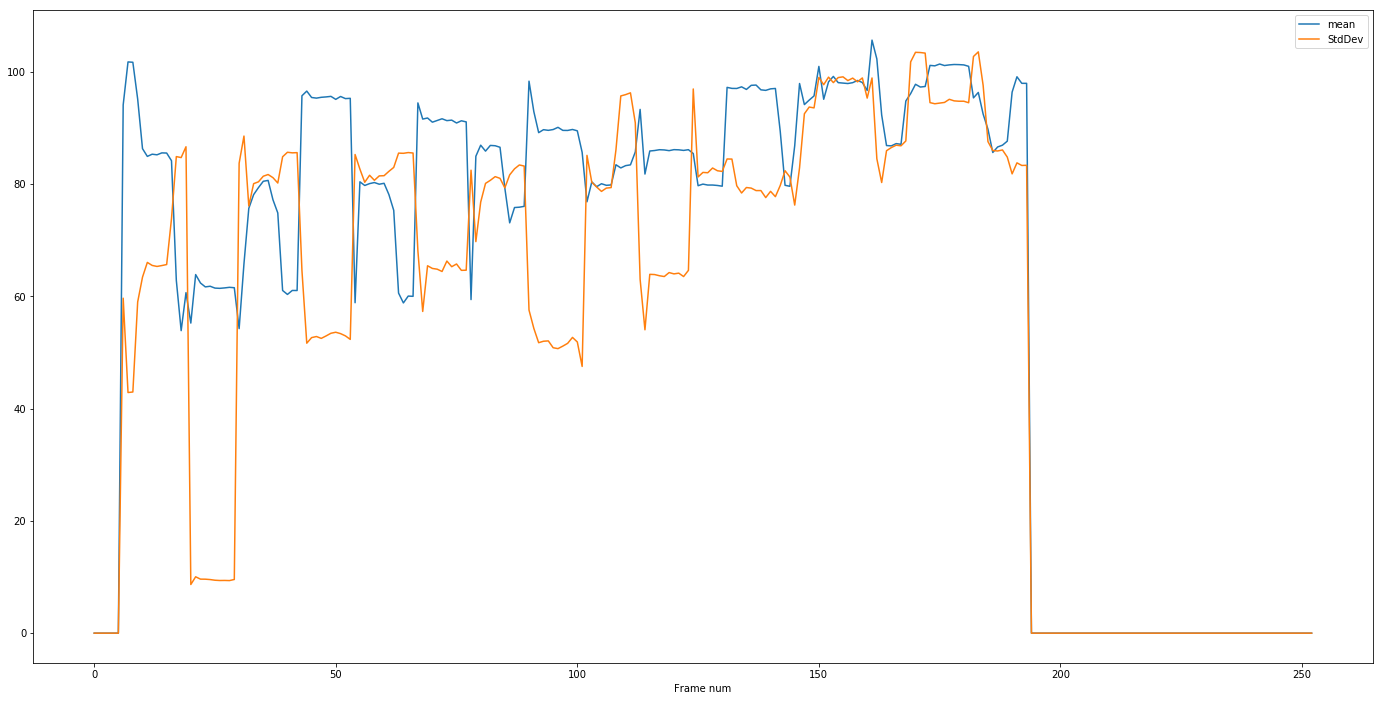

In [36]:
plt.figure( figsize=(24,12))
plt.plot( data )

plt.xlabel('Frame num')
plt.ylabel('')
plt.legend(['Mean', 'StdDev'])
